In [272]:
from astropy.io import fits
import numpy as np
from scipy.ndimage import binary_erosion, maximum_filter, generate_binary_structure, iterate_structure, find_objects
from scipy.ndimage import label
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

In [43]:
img = fits.open('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim12/img/sim12_r.fits.gz')[0].data
weight = fits.open('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim12/img/sim12_r.weight.fits.gz')[0].data

In [296]:
var = weight.copy()
var = np.sqrt(np.reciprocal(var))

/tmp/ipykernel_18795/1801981607.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  var = np.sqrt(np.reciprocal(var))


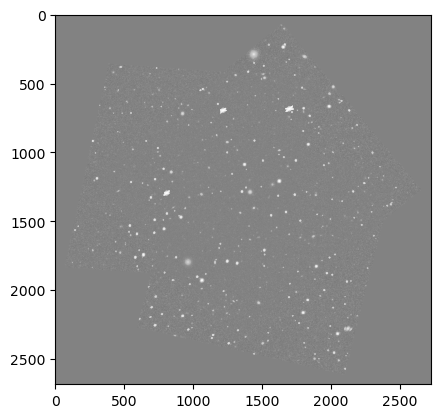

In [297]:
plt.imshow(img, norm=SymLogNorm(50), cmap='Greys_r')
plt.show()

In [300]:
mask = (img / var < 5)
filtered = img.copy()
filtered[mask] = 0.

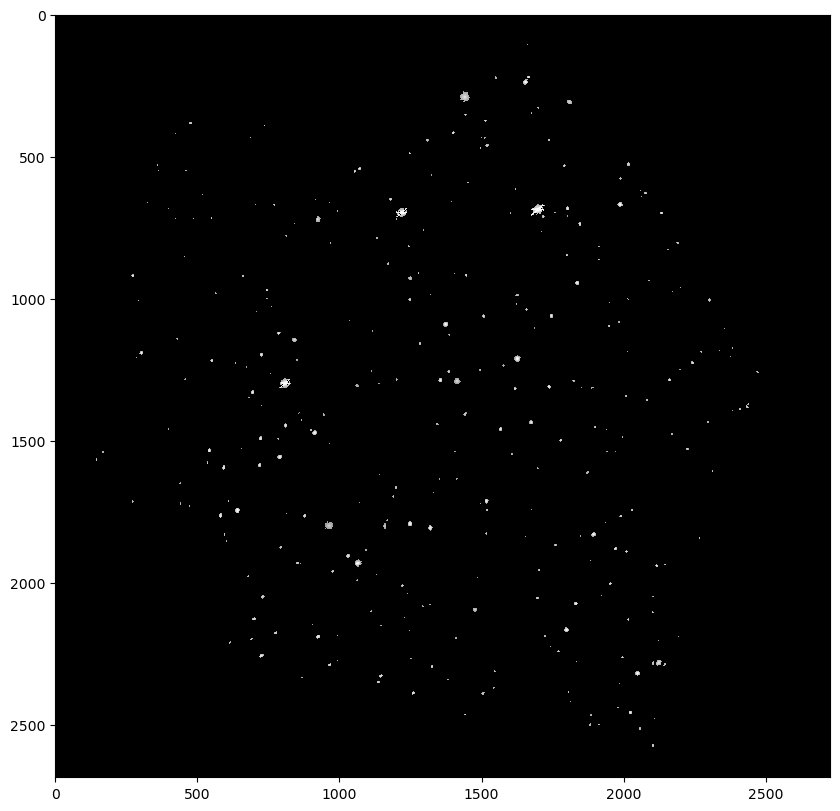

In [301]:
plt.figure(figsize=(10, 10))
plt.imshow(filtered, cmap='Greys_r', norm=SymLogNorm(1), interpolation='nearest')
plt.show()

In [302]:
labeled = label(filtered > 0)[0]

In [303]:
objs = find_objects(labeled)

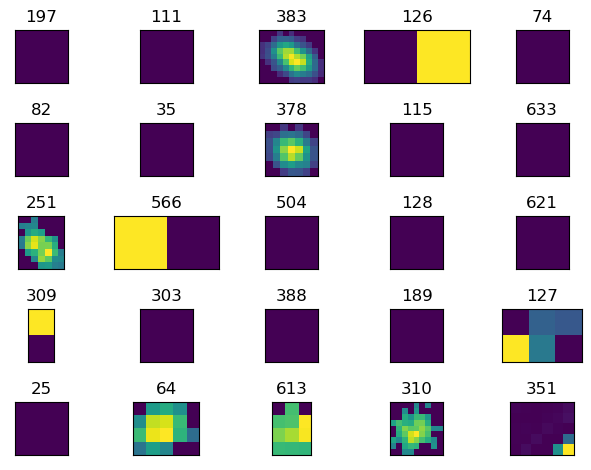

In [304]:
idx = np.random.choice(len(objs), 25)
fig, axes = plt.subplots(nrows=5, ncols=5)
for i, ax in zip(idx, axes.ravel()):
    ax.imshow(filtered[objs[i]])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(i)
plt.tight_layout()

In [305]:
labeled

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [315]:
x, y = np.nonzero(labeled[objs[251]])
x += objs[251][0].start
y += objs[251][1].start

In [317]:
labeled[x,y]

array([252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252,
       252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252,
       252, 252, 252, 252, 252, 252, 252, 252], dtype=int32)

In [318]:
labeled[objs[251]]

array([[  0,   0, 252,   0,   0,   0,   0],
       [252, 252, 252,   0,   0,   0,   0],
       [  0, 252, 252, 252,   0,   0,   0],
       [252, 252, 252, 252, 252, 252,   0],
       [252, 252, 252, 252, 252, 252,   0],
       [  0, 252, 252, 252, 252, 252, 252],
       [  0,   0, 252, 252, 252, 252, 252],
       [  0,   0,   0, 252, 252, 252, 252]], dtype=int32)